<a href="https://colab.research.google.com/github/brunoegs/DiploDatos_AyVD_Grupo18/blob/main/entregable_parte_1/Entregable_Parte_1_Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [50]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [51]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [52]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


Reemplazamos de los valores NaN en la columna **salary_in_usd** por el valor "Uknown"

In [53]:
df.salary_in_usd.fillna('Uknown', inplace=True)

df.salary_in_usd.value_counts()

Uknown                       5419
Mi sueldo está dolarizado     676
Name: salary_in_usd, dtype: int64

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**



Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

Con el objetivo de responder a la pregunta propuesta por los profesores, decidimos agregar como variables relevantes, además de **tools_programming_languages** y  **salary_monthly_NETO** relacionadas directamente con el objetivo del ejercicio, el **salary_monthly_BRUTO**, **salary_in_usd** y **work_role**. El **salary_monthly_BRUTO** se considerada al momento de realizar la limpieza de los datos con el proposito de obtener un dataset con valores a analizar lo más rezonables posible. Por otra parte las variables **salary_in_usd** y **work_role**  se utilizan para analizar en profundidad aquellos valores que puedan parecernos extremos y, en especial **work_role** para analizar un subconjunto del total.

In [54]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO', 'salary_in_usd','work_role']

Primero realizamos la eliminación de los valores atípicos. Eliminamos aquellos valores que se encuentren a más de 2.5 desviaciones estándar de la media. Nuestro nuevo dataset queda compuesto por el 94% de los datos del conjunto anterior. 

Podemos observar que el salario neto máximo para nuestro nuevo conjunto de datos  es $332K, este valor puede pensarse como un sueldo razonable en nuestro país si se tiene un puesto de jerarquía, muchos años de experiencia o bien el salario real es en dolares.

Analizando ese subconjunto de datos podemos vizualizar que el 70% de los que tienen un salario mayor a 300k tiene su sueldo dolarizado. ¿Qué ocurre con el 30% restante, tienen algún cargo jerárquico?. En base al gráfico que muestra los diferentes roles que tienen sueldo superior a 300k y si está dolarizado o no, puede obeservarse que en su mayoría tiene puestos jerarquico por lo que no sería tan raro que tenga ese tipo de salario.


In [55]:
# Eliminación de valores atípicos
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

df_1 = clean_outliers(df, relevant_columns[1])

In [56]:
print('Total de datos en el data set original: {}'.format(len(df)))
print('Total de datos en el data set luego de eliminar valores atípicos: {}'.format(len(df_1)))
print('% de datos eliminados: {}'.format(1-(len(df_1)/len(df))))

Total de datos en el data set original: 6095
Total de datos en el data set luego de eliminar valores atípicos: 5741
% de datos eliminados: 0.05808039376538143


In [57]:
df_1.salary_monthly_NETO.describe()

count      5741.000000
mean      83627.618458
std       50278.152420
min           1.000000
25%       50400.000000
50%       75900.000000
75%      104000.000000
max      332100.000000
Name: salary_monthly_NETO, dtype: float64

### Análisis de los salarios netos mayores a 300k

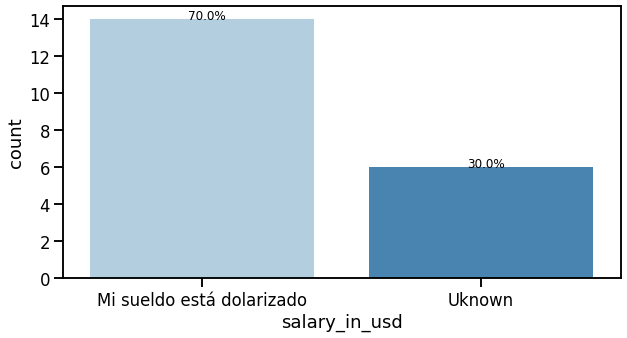

In [58]:
max_salary = 300000
data_max = df_1[df_1[relevant_columns[1]] > max_salary]

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

fig, axes = plt.subplots(figsize=(10, 5))
ax = seaborn.countplot(x=relevant_columns[3], data=data_max, palette='Blues')

without_hue(ax, data_max.salary_in_usd)

### Análisis del rol que tiene cada uno de los encuestados

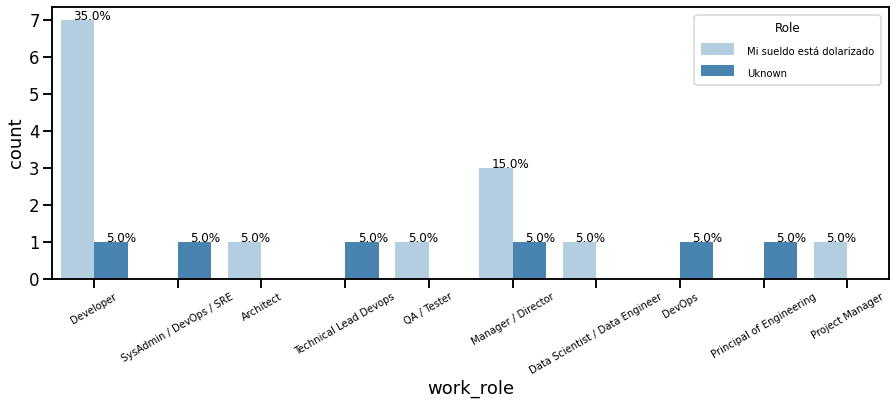

In [59]:
salary_usd = 'Unknown'
data_role = df_1[df_1[relevant_columns[3]] == salary_usd]

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

fig, axes = plt.subplots(figsize=(15, 5))
ax = seaborn.countplot(x='work_role',hue=relevant_columns[3], data=data_max, palette='Blues')
ax.legend(title='Role', loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, size=10) # for axis labels
plt.setp(ax.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title


without_hue(ax, data_max.salary_in_usd)

Realizamos gráficos que nos permitan visualizar la distribución de **salary_monthly_NETO** luego de la eliminación de los valores extremos.

En los gráficos observamos que hay salarios muy bajos, cercanos a 0, los que nos llama la atención. Es por ello, que decidimos analizar ese subconjunto de datos para entender que está ocurriendo.

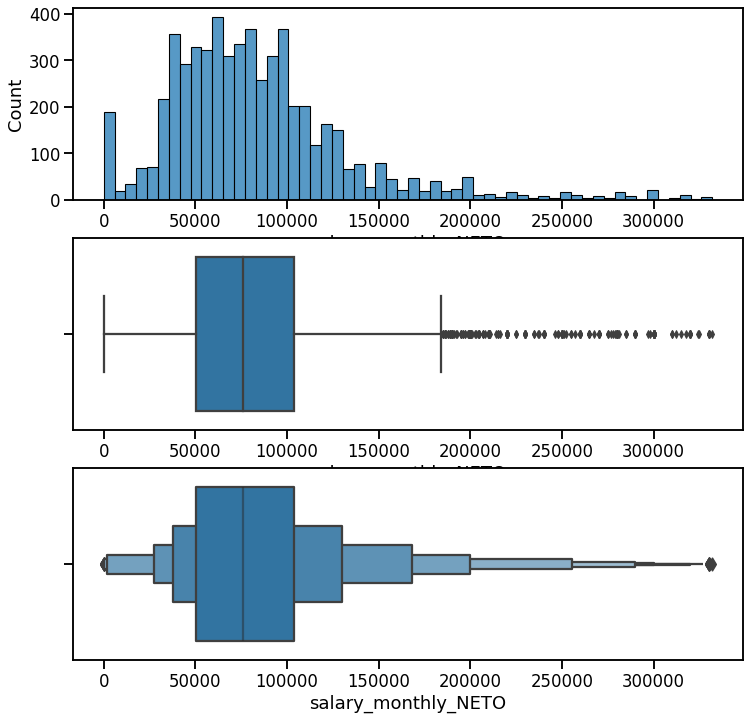

In [60]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
seaborn.histplot(x=df_1.salary_monthly_NETO, ax=axes[0])
seaborn.boxplot(x=df_1.salary_monthly_NETO, ax=axes[1])
seaborn.boxenplot(x=df_1.salary_monthly_NETO, ax=axes[2])

In [61]:
df[df[relevant_columns[1]] < 10000][:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
103,Hombre,32,Argentina,GBA,15.0,9.0,9.0,0,Universitario,En curso,Licenciatura en Informática,Universidad Nacional del Oeste,"Sí, los pagó un empleador",No,Sí,DBA,Windows Server,".NET, C#, CSS, HTML, Javascript, SQL, VBA",".NET Core, Bootstrap, jQuery, Laravel, Symfony...","MariaDB, Microsoft Azure (Tables, CosmosDB, SQ...",JUnit,"Android Studio, Eclipse, Notepad++, Vi, Vim, V...",Windows,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,33000.0,27.0,Uknown,1,1,Menos de un sueldo,Bonos para todo el sector publico nacional,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,10001+,Otras industrias,10,8,"Capacitaciones y/o cursos, Clases de idiomas, ...",NaN
105,Mujer,33,Argentina,GBA,9.0,0.0,7.0,0,Universitario,Incompleto,Licenciatura en Análisis de Sistemas,UBA - Universidad de Buenos Aires,No,No,No,Business Analyst,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Notepad++,Windows,Android,No,0.0,Bruto,Tercerizado (trabajo a través de consultora o ...,80000.0,67.0,Uknown,1,1,No,No recibo bono,No,0.0,0,En un trabajo anterior,Heterosexual,NaN,NaN,201-500,Servicios / Consultoría de Software / Digital,5,7,Clases de idiomas,NaN
109,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,10.0,10.0,5.0,4,Terciario,En curso,Analista de Sistemas,ORT,"Sí, de forma particular",No,Sí,Jefe de infraestructura,"Azure, Linux, VMWare, Windows Server","C#, SQL",Ninguno,Microsoft SQL Server,Ninguna,Visual Studio,Windows,iOS,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,95.0,Uknown,2,2,De uno a tres sueldos,Performance de la compañía,Uno,18.0,5,Jamás,¿Qué les importa?,NaN,No,201-500,Servicios / Consultoría de Software / Digital,5,6,Abono de celular,Google despegar mercadolibre


Como se puede apreciar en la tabla mostrada, aquellos valores inferiores a 10000 corresponden a datos erroneos, ya que se aprecia un error en la introducción del dato, es por ellos que se toma la decisión de eliminarlos.

Controlamos si ocurría lo mismo en el salario bruto, y notamos que se repetía el mismo error.

In [62]:
df_1 = df_1[df_1[relevant_columns[1]] > 10000]

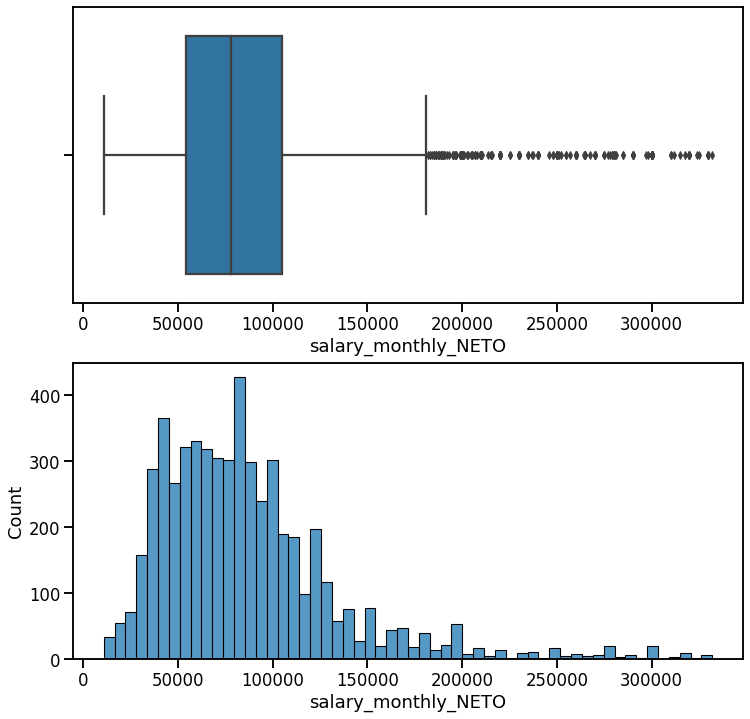

In [63]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=2)
seaborn.boxplot(x=df_1.salary_monthly_NETO, ax=axes[0])
seaborn.histplot(x=df_1.salary_monthly_NETO, ax=axes[1])

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [64]:
df_1.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [65]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_1.loc[:, 'cured_programming_languages'] = df_1.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df_1.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_1[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_in_usd,work_role,cured_programming_languages
0,ninguno,Ninguno,43000.0,53000.0,Uknown,Consultant,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,79000.0,Uknown,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Uknown,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Uknown,Developer,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,160000.0,Uknown,Infosec,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [66]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:3]

,language,frequency
0,javascript,2250
1,sql,1972
2,html,1677


In [67]:
language_count['proporcion'] = language_count['frequency']/language_count['frequency'].sum()
language_count['frequency_acumulada'] = language_count.proporcion.cumsum()
language_count_filtred= language_count[language_count['frequency_acumulada'] < 0.95]
language_count_filtred

,language,frequency,proporcion,frequency_acumulada
0,javascript,2250,0.138359,0.138359
1,sql,1972,0.121264,0.259624
2,html,1677,0.103124,0.362748
3,java,1340,0.082401,0.445148
4,python,1340,0.082401,0.527549
5,css,1119,0.068811,0.596360
6,bash/shell,912,0.056082,0.652441
7,php,805,0.049502,0.701943
8,.net,754,0.046366,0.748309
9,typescript,689,0.042369,0.790678


Se decidió tomar aquellos lenguajes de programación que representan el 95% de los datos como criterio. Obtenemos como resultado 20 lenguajes de programación.

### Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [68]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = list(language_count_filtred['language'])
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:3]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_in_usd,work_role,cured_programming_languages
0,ninguno,Ninguno,43000.0,53000.0,Uknown,Consultant,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,79000.0,Uknown,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Uknown,Developer,"[html, javascript, python]"


In [69]:
# Orden en base al salario promedio por lenguaje
df_2 = filtered_df_lang[filtered_df_lang.programming_language.isin(interesting_languages)].groupby('programming_language')['salary_monthly_NETO']\
      .mean().sort_values(ascending=False).reset_index()
list_order_salary_lang=list(df_2.programming_language)


## Graficos y Conclusion

Tomamos el 95% de los lenguajes mas utilizados por los encuestados, realizamos un grafico de cajas para cada languaje y un grafico de las medias, superponiendo a estos graficos la media, mediana, y cuantiles 25 y 75 del conjunto de datos, con el objetivo de analizar los salarios de cada lenguaje en relacion al conjunto total.

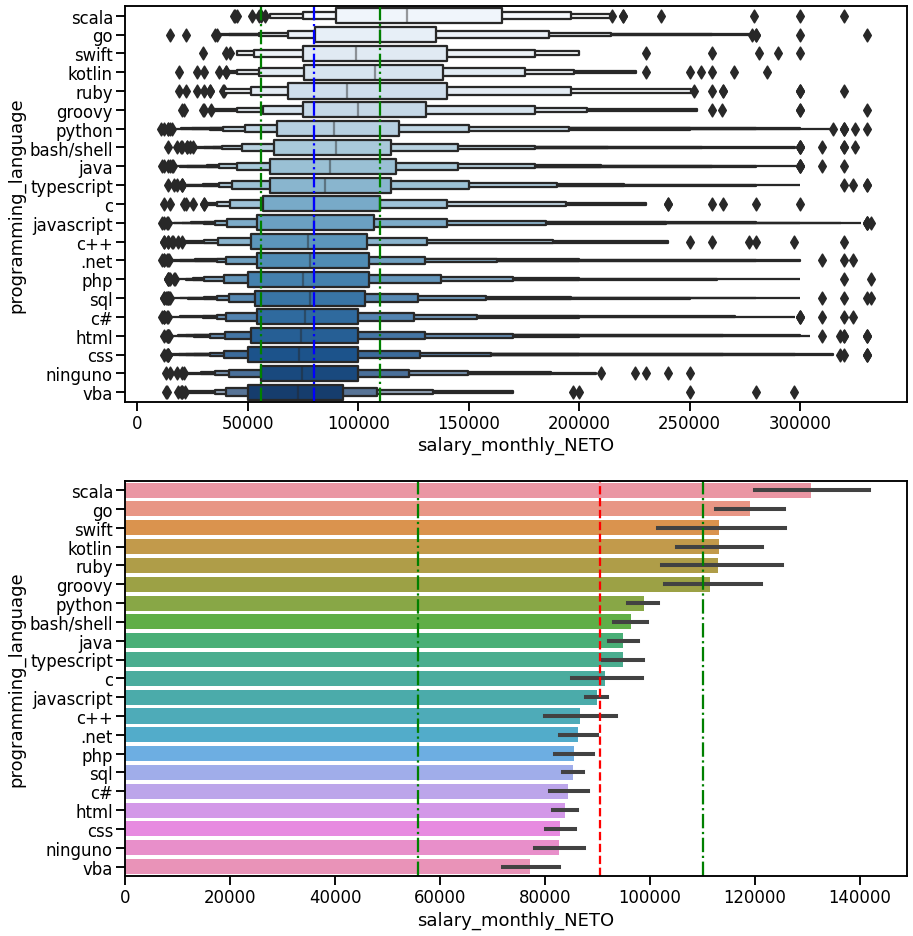

In [70]:
fig, axes = plt.subplots(nrows=2, figsize=(14, 16))
seaborn.boxenplot(x=filtered_df_lang.salary_monthly_NETO,
                  y=filtered_df_lang.programming_language, 
                  order=list_order_salary_lang, 
                  palette='Blues',
                  ax=axes[0])
axes[0].axvline(filtered_df_lang['salary_monthly_NETO'].median(), color='blue',
            linestyle='-.', label='Mediana')
axes[0].axvline(filtered_df_lang['salary_monthly_NETO'].quantile(.25), color='green',
            linestyle='-.', label='cuantil 25')
axes[0].axvline(filtered_df_lang['salary_monthly_NETO'].quantile(.75), color='green',
            linestyle='-.', label='cuantil 75')

seaborn.barplot(x=filtered_df_lang.salary_monthly_NETO, 
                y=filtered_df_lang.programming_language,
                order=list_order_salary_lang,
                ax=axes[1]
                )
axes[1].axvline(filtered_df_lang['salary_monthly_NETO'].mean(), color='red',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df_lang['salary_monthly_NETO'].quantile(.25), color='green',
            linestyle='-.', label='cuantil 25')
axes[1].axvline(filtered_df_lang['salary_monthly_NETO'].quantile(.75), color='green',
            linestyle='-.', label='cuantil 75')

En base a los graficos, podemos pensar en tres grupos de lenguajes: 
* Un primer grupo: ('scala','go','swift','kotlin','ruby','groovy') en el cual pareceria que se pagan los mayores salarios, como podemos apreciar el promedio de sueldos de cada uno de los lenguajes de este grupo es mayor que el percentil 75 de todo el conjunto de salarios. En el caso de 'scala' y 'go', su mediana se encuentra por encima del percentil 75 de todo el conjunto de datos.
* Un segundo grupo: ('python','bash/shell','java','typescript','c','javascript') cuyas medias estan por encima o muy cercana a la media del conjunto y sus medianas estan por encima de la mediana de todo el conjunto.
* Un tercer grupos: ('c++','.net','php','sql' ,'c#','html','css','vba') cuyas medias se encuentran por debajo de la media del conjunto y sus medianas por debajo de la mediana del conjunto.

Particularmente en los lenguajes del primer grupo se ve que sus medias tienen intervalos de confianza del 95% bastante más grandes que los de los otros lenguajes. Esto en parte sucede debido a que este grupo de lenguajes tiene bastante menos muestras, no obstante, ninguno de sus CIs se solapan con el de los otros lenguajes. Por esto podemos observar que este grupo es el que se lleva los salarios netos mensuales más altos.

Por último, debemos tener en cuenta que cada uno de los individuos que respondieron la encuesta no saben únicamente un lenguaje de programación, y que esto podría provocar algún sesgo en los salarios que se asignan a un único lenguaje, ya que el salario podría estar más relacionado a todo el conjunto de lenguajes que utiliza el individuo.